In [1]:
import sys
sys.path.append('../')
from cardiac_evalfunctions import *
import active_dynamicmemory.runutils as rutils
import matplotlib
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [6]:
ds.df.groupby('scanner').count()

,filepath,t,slice,split,slicepath
scanner,,,,,
Canon,758,758,758,758,758
GE,720,720,720,720,720
Philips,2206,2206,2206,2206,2206
Siemens,614,614,614,614,614


In [3]:
round(4298/20), round(4298/10), round(4298/8), round(4298/5)  

(215, 430, 537, 860)

To see the dynamics during training validation curves can be plotted by calling `plot_validation_curves(<path_to_config_files>, [optional <list of method names>], [optional <list of random seeds>])`.
Note: Plotting those curves is only useful for methods trained on a continuous datastream

['Siemens', 'GE', 'Philips', 'Canon']


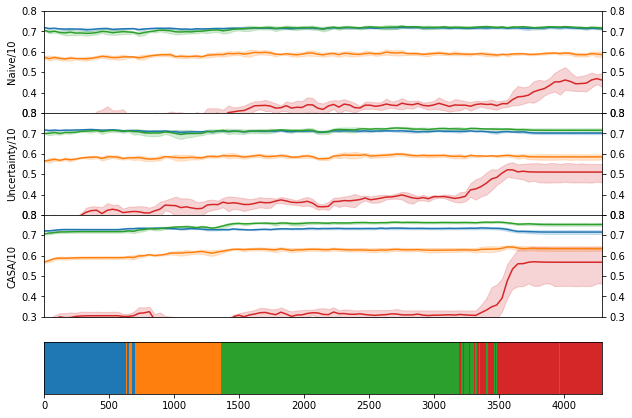

In [5]:
plot_validation_curves(['../training_configs/cardiac_naive.yml',
                                '../training_configs/cardiac_uncertainty.yml',
                                '../training_configs/cardiac_casa.yml'], 
                               names=['Naive/10','Uncertainty/10', 'CASA/10'], seeds=[1, 2, 3, 4, 5])

To evaluate a specific config call `eval_config(<path_to_config_file>)`.

Results are cached to avoid recalculation.

In [4]:
df_overview = eval_config_list(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_uncertainty.yml', 
                                '../training_configs/cardiac_casa.yml'],
                               ['Naive', 'Uncertainty', 'CASA'], seeds=[1, 2, 3, 4, 5])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
CASA,0.812,0.731,0.803,0.676,-0.006,0.086
Naive,0.819,0.707,0.761,0.564,-0.004,0.060
Uncertainty,0.816,0.700,0.764,0.652,-0.003,0.067


## different MEM sizes

In [12]:
split='test'
df = pd.DataFrame()
seeds = [1, 2, 3, 4, 5]

with open(f'../training_configs/cardiac_casa.yml') as f: #cardiac_casa_5, cardiac_casa_10
    params = yaml.load(f, Loader=yaml.FullLoader)
for mem_size in [64, 256, 512, 128, 1024]:
    params['trainparams']['memorymaximum'] = mem_size

    for i, seed in enumerate(seeds):
        params['trainparams']['seed'] = seed
        params['trainparams']['run_postfix'] = seed
        df_temp = eval_params(params, split=split)
        df_temp['seed'] = seed
        df_temp['mem_size'] = mem_size
        df_temp['method'] = 'CASA'
        df = df.append(df_temp)
        
with open(f'../training_configs/cardiac_naive.yml') as f: #cardiac_casa_5, cardiac_casa_10
    params = yaml.load(f, Loader=yaml.FullLoader)
for mem_size in [64, 256, 512, 128, 1024]:
    params['trainparams']['memorymaximum'] = mem_size

    for i, seed in enumerate(seeds):
        params['trainparams']['seed'] = seed
        params['trainparams']['run_postfix'] = seed
        df_temp = eval_params(params, split=split)
        df_temp['seed'] = seed
        df_temp['mem_size'] = mem_size
        df_temp['method'] = 'Naive'
        df = df.append(df_temp)
        
with open(f'../training_configs/cardiac_uncertainty.yml') as f: #cardiac_casa_5, cardiac_casa_10
    params = yaml.load(f, Loader=yaml.FullLoader)
for mem_size in [64, 256, 512, 128, 1024]:
    params['trainparams']['memorymaximum'] = mem_size

    for i, seed in enumerate(seeds):
        params['trainparams']['seed'] = seed
        params['trainparams']['run_postfix'] = seed
        df_temp = eval_params(params, split=split)
        df_temp['seed'] = seed
        df_temp['mem_size'] = mem_size
        df_temp['method'] = 'Uncertainty'
        df = df.append(df_temp)

df=df.loc[df.scanner!='BWT']
df=df.loc[df.scanner!='FWT']

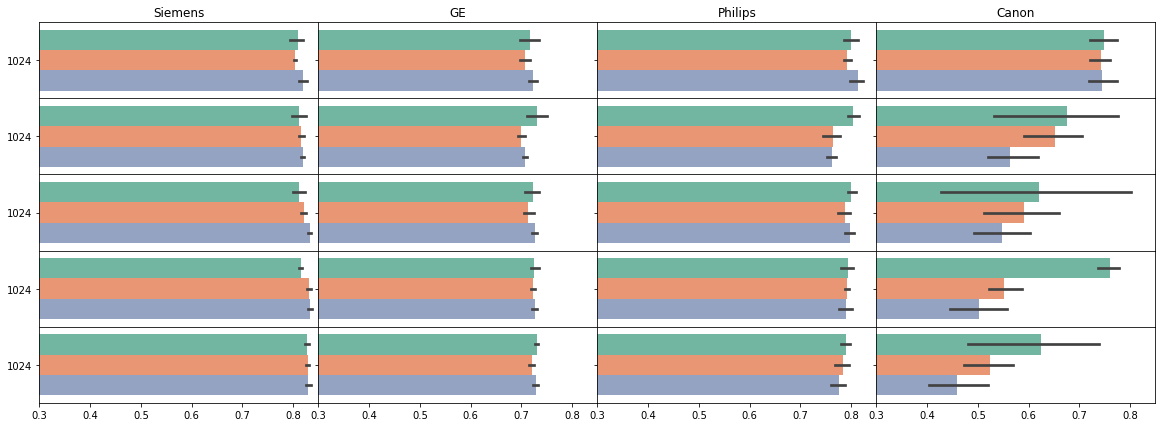

In [17]:
df_piv = pd.pivot_table(df, values='mean', columns='scanner', index=['mem_size', 'seed', 'method']).reset_index()
fig, ax = plt.subplots(5, 4, figsize=(20, 7), sharey=True, sharex=True)
plt.subplots_adjust(wspace = .0, hspace=.0)

for r, mem_size in enumerate([64, 128, 256, 512, 1024]):

    df_temp = df_piv.loc[df_piv.mem_size==mem_size]

    sns.barplot(data=df_temp, x='Siemens', y='mem_size', hue='method', orient='h', ax=ax[r][0], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][0].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][0].set_title('Siemens')
    ax[r][0].set_ylabel('')
    ax[r][0].get_legend().remove()
    ax[r][0].set_xlabel('')
    #ax[r][0].set_xticks([''])

    sns.barplot(data=df_temp, x='GE', y='mem_size', hue='method', orient='h', ax=ax[r][1], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][1].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][1].set_title('GE')
    ax[r][1].get_legend().remove()
    ax[r][1].set_ylabel('')
    ax[r][1].set_xlabel('')


    sns.barplot(data=df_temp, x='Philips', y='mem_size', hue='method', orient='h', ax=ax[r][2], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][2].set_xlim([0.5, 0.85])
    if r==0:
        ax[r][2].set_title('Philips')
    ax[r][2].get_legend().remove()
    ax[r][2].set_ylabel('')
    ax[r][2].set_xlabel('')

    sns.barplot(data=df_temp, x='Canon', y='mem_size', hue='method', orient='h', ax=ax[r][3], hue_order=['CASA', 'Uncertainty', 'Naive'])
    ax[r][3].set_xlim([0.3, 0.85])
    if r==0:
        ax[r][3].set_title('Canon')
    ax[r][3].get_legend().remove()
    ax[r][3].set_ylabel('')
    ax[r][3].set_xlabel('')
fig.savefig('/project/catinous/active_catinous/MELBA/output/results/memory_size_newcolor.pdf')